In [11]:
# !pip install openai python-dotenv "pydantic>=2.7,<2.10"
# !pip install langchain langchain-openai langchain-text-splitters langchain-community
# !pip install faiss-cpu "numpy>=1.22.4,<2.3.0" tiktoken

import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
print("OpenAI client initialized successfully")

OpenAI client initialized successfully


# What [AI Companies](https://sequoiacap.com/article/ai-50-2025/) Look For

**Technical Skills:**
- Solid software engineering fundamentals
- Experience developing software using LLMs
- Built complex agentic systems using LLMs
- Worked with RAG, knowledge graphs, query understanding, distributed data systems

**AI Development Tools:**
- Use AI coding assistants: Cursor, Windsurf, GitHub Copilot
- Understand that AI is changing expectations of software engineering
- Keep up with new AI technologies and research

**Generic Qualities:**
- Result-oriented mindset
- Continuous learning and adaptation to new AI technologies

<img src="https://sequoiacap.com/wp-content/uploads/sites/6/2025/04/ai-50-2025.png" width=800>

---



# The Evolution: RNN → Seq2Seq → Transformer


Each new architecture fixed limitations of the previous one, leading to today's Transformers and LLMs.

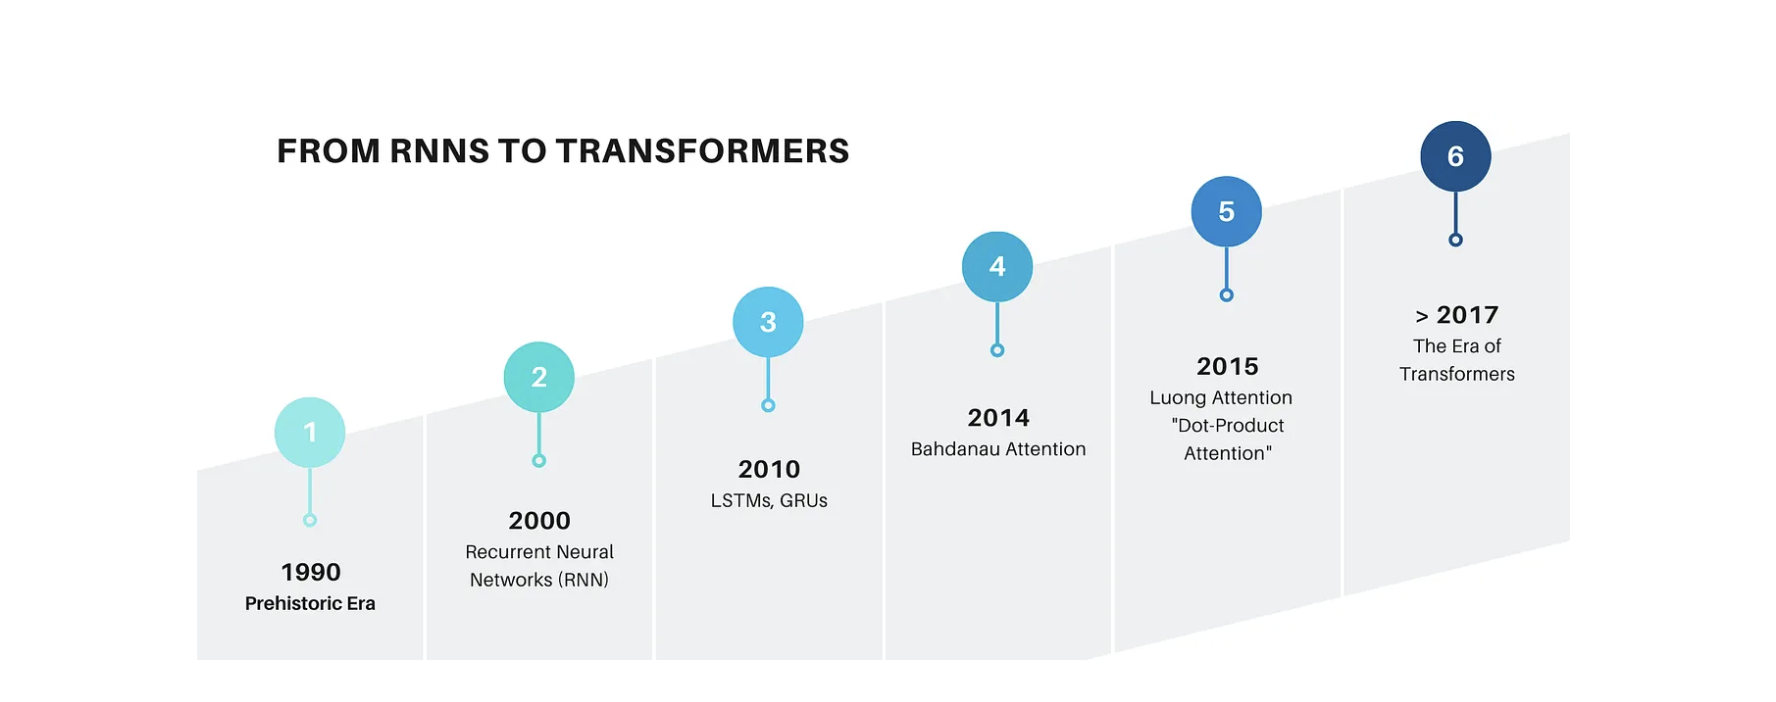



## RNN/LSTM/GRU
Processed sequences step-by-step, good for short sequences but struggled with long-term dependencies due to vanishing/exploding gradients.  



### RNNs – First generation sequence models
Recurrent Neural Networks (RNNs) are the first family of neural networks that really understand sequences. They process input one step at a time and carry a 
hidden “memoryˮ from step to step.

- At each time step `t`, the RNN:
  - reads the current token `x_t`
  - updates a hidden state `h_t` based on `x_t` and the previous state `h_{t-1}`
- This hidden state acts as a **compressed memory** of everything seen so far.    

They were a big improvement over simple feed-forward networks for tasks like:
- Sentiment analysis,
- Speech recognition,
- Basic language modeling (predicting the next word).

But RNNs have **two big problems**:
1. **Long-term dependency problem**   
- Information from very **early tokens gets “lostˮ** as the sequence gets longer.
- This is related to **vanishing / exploding gradients** during training.
  
2. **Sequential bottleneck**
- They process tokens **strictly in order**, which makes training and inference **slower** and **harder to parallelize**



## Seq2Seq (Encoder-Decoder RNN) 
**Flexible input/output lengths**, good for translation and summarization, but compresses everything into **one context vector**.

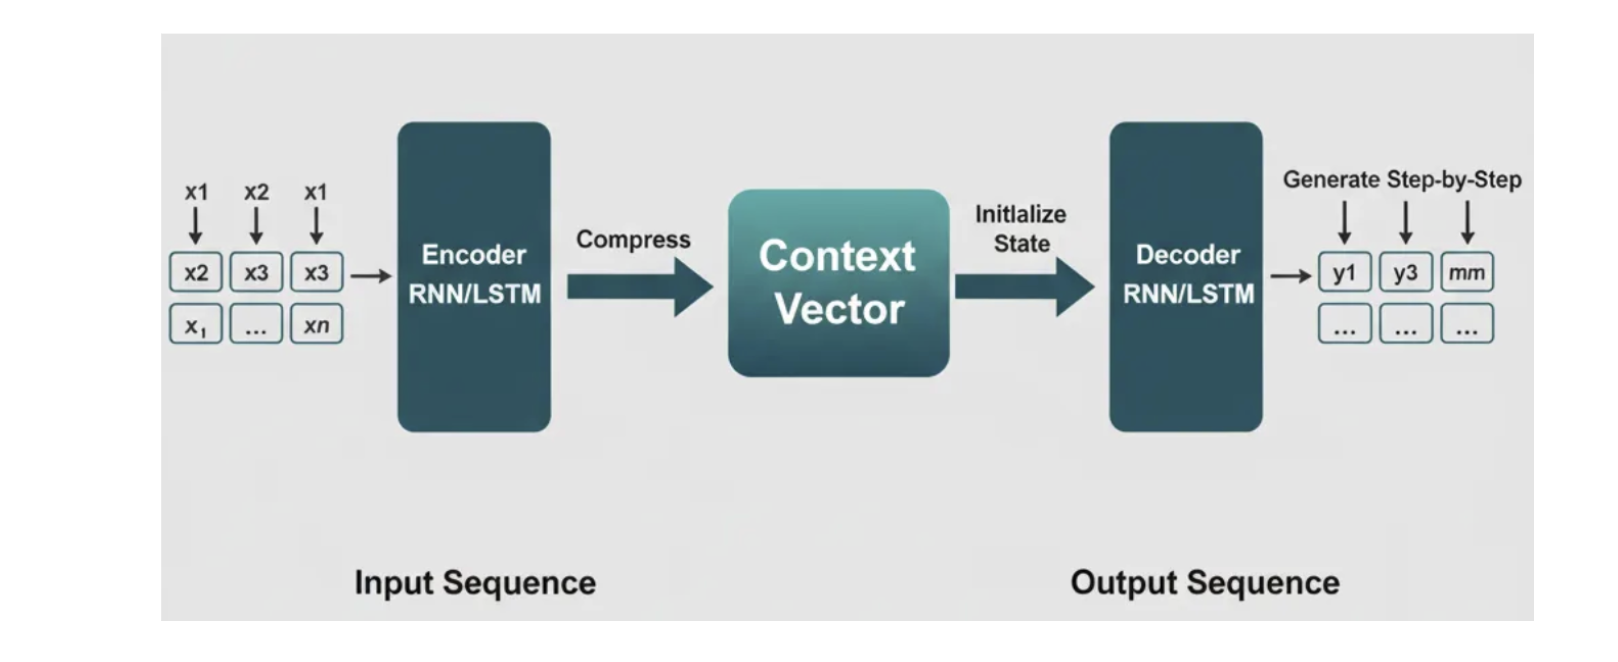

For tasks like machine translation or summarization, we need to map a variable-length input to a variable-length output. Thatʼs where Seq2Seq (Sequence-to-Sequence) models come in.  

**Basic idea:**
- **Encoder RNN**:
  - Reads the entire input sequence.
  - Compresses it into **a single context vector**.
- **Decoder RNN**:
  - Starts from that context vector.
  - Generates the output sequence **one token at a time**.
  
This architecture made it possible to:
- *Translate* sentences between languages.
- *Summarize* documents.
- Build *early chatbots and Q&A* systems.

But it still has **limitations**:
- For long input sentences, one fixed-size context vector struggles to **store** all the important information.
- **Performance** drops as sentences get longer.

## Seq2Seq + Attention 
Decoder can look at **all encoder states**; much better for long sentences, but still uses **RNNs** (sequential bottleneck).

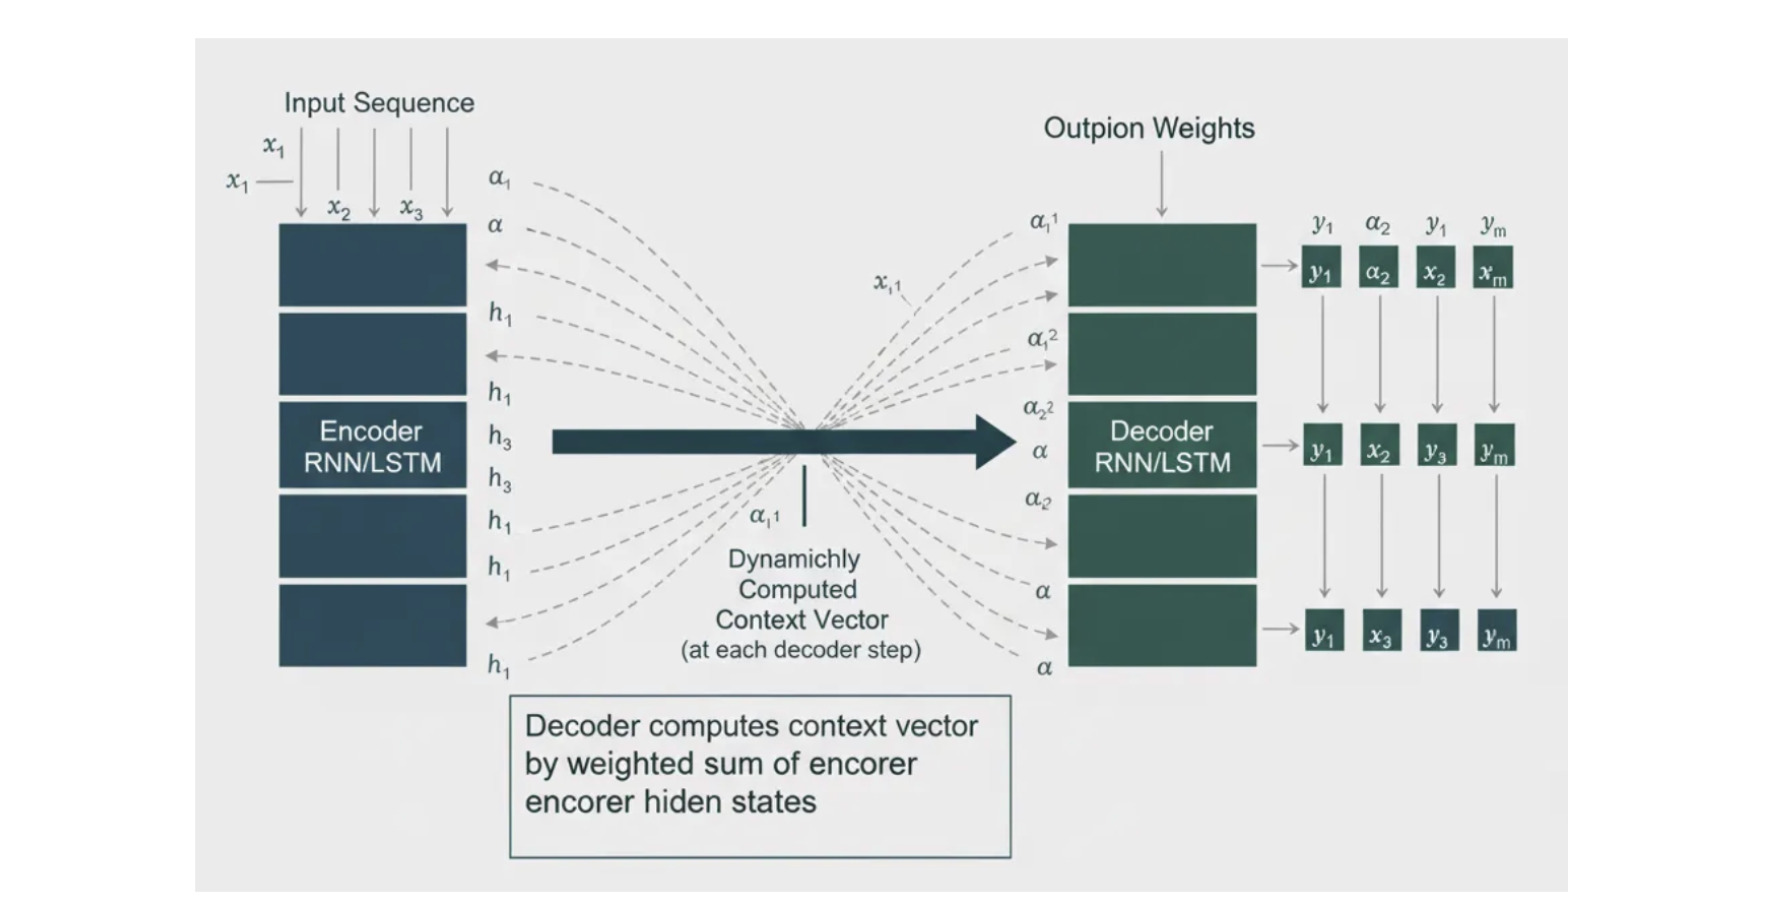

To fix the “single bottleneck vectorˮ problem, the **attention mechanism** was introduced.  

Instead of compressing everything into one vector:
- The encoder RNN now outputs **a sequence of hidden states**: `h1, h2, ..., hT`.
- For each output token, the decoder:
  - Looks back at **all** encoder hidden states.
  - Assigns **attention weights** to them.
  - Forms **a weighted sum (a context vector)** that **focuses on the most relevant** parts of the input.
  
Thus:     
When generating each word in the output sentence, the model can “pay attentionˮ to the specific words in the input that matter most for that step.

**Benefits:**  
- Much **better translation quality** for long sentences.
- More **interpretable alignments** between source and target tokens.


## Transformers ([《Attention is all you need》](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf))
Drop recurrence entirely, use self-attention + parallelization; this is the **foundation of modern LLMs** (GPT, BERT, Claude, etc.).

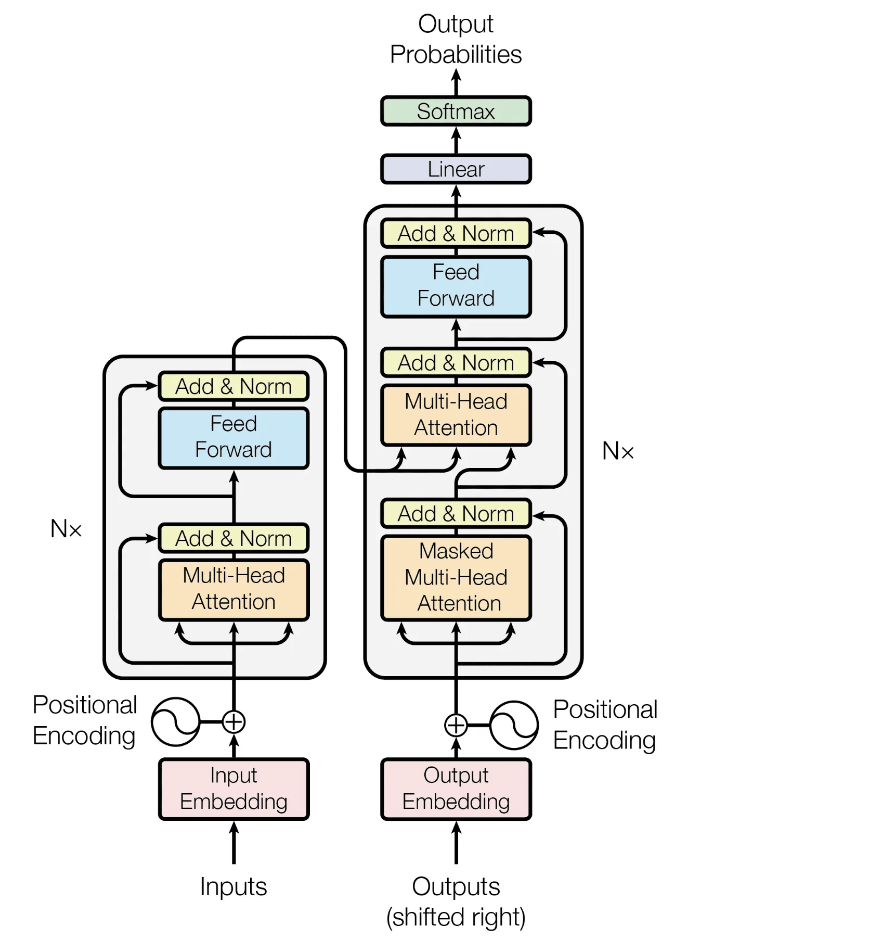

**Key ideas:**   
- Process **all tokens in parallel** rather than one-by-one.
- Use **self-attention** so each token can look at every other token in the sequence.
- Add **positional encodings** so the model still knows the **order of tokens**.

A Transformer layer typically has:   
1. **Multi-head self-attention**
- Each head learns a different way of looking at relationships between tokens. 

2. **Feed-forward network (FFN)** applied to each position.
3. **Residual connections + LayerNorm** for stable training.  

**Why Transformers matter:**   
- They handle **long-range dependencies** much better.
- They are **highly parallelizable**, so we can train on huge datasets.
- They scale to very large models (BERT, GPT, T5, etc.), which leads directly to 
todayʼs LLMs.
---



# LLM Basics & Why We Need RAG

## what is LLM
A Large Language Model is a **huge neural network** trained on **massive amounts of 
text (books, code, websites, docs)**. It learns patterns like:
- Common words and phrases.
- Grammar and style.
- How different concepts relate.

At inference time it **does one simple thing over and over**: 
- **Predict the next token given all previous tokens**.   

Because it repeats this step thousands of times, it can produce full paragraphs, code, emails, etc.     



### Modern LLM Architecture
- Models like GPT, Claude, Gemini, Llama are built on the **Transformer** architecture.
- Transformers use **attention**:
    - They can look at **all tokens at once**, not sequentially like RNNs.
    - This makes them better at **reasoning**, long-range dependencies, and multimodal understanding.

### Various Models

#### Model Size (Small vs. Large)

Choose model size based on workload, cost, and reasoning needs.


| model size affects: | Small models | Large models |
|---------------------|--------------|--------------|
| Cost                  |Cheap                                 |Expensive           |
| Speed                 |Fast                                  |Slower|
| Hardware requirements |Can run on normal GPUs (even laptops) |Need powerful GPUs|
| Reasoning ability     |Less capable                          |Better reasoning + creativity + multimodality|


#### Different LLM Families (Model Providers)
There are many LLMs; you choose based on capability, price, or openness.  

- OpenAI (GPT-4o, o1, 4.5, o3-mini, etc.)
- Anthropic (Claude 3.7)
- Google (Gemini 2.5 Pro)
- Meta (Llama)
- Hugging Face (community open-source models)

#### Fine-tuning vs. Prompting

A key distinction in LLM usage:   
- **Prompting**
  - You tell the model **what** to do.
  - No training needed.
- **Fine-tuning**
  - You teach the model **how** to behave by giving it examples.
  - Improves performance on domain-specific tasks.

Prompting is quick; fine-tuning is for specialized jobs.   

## How Modern LLMs Work
LLMs work by tokenizing input and predicting the next token based on context, which is powerful but limited, so we use RAG to ground them in real, up-to-date knowledge.

### 1. Tokenization      

Tokenization is how an LLM breaks text into pieces called tokens      
- Models don’t understand words, they process tokens
- Cost, latency, and limits are all token-based



#### What are Tokens?
- Tokens are the **basic units** that LLMs process (**not exactly words**)
- [It might be: ](https://platform.openai.com/tokenizerAn) 
  - entire short word:  `cat`
  - Part of a longer word:  `inter`,  `national`
  - Punctuation or spaces: `.`, `,`, `</s>`
- Example tokenization:
  - "Hello world" → ["Hello", " world"] (2 tokens)
  - "ChatGPT" → ["Chat", "G", "PT"] (3 tokens)
  - "programming" → ["program", "ming"] (2 tokens)

Rough intuition for English: 1 token $\approx$ 3-4 characters, but this is only an approximation.    

Because of this, **almost everything important for LLMs is measured in tokens, not characters**:   
- The context window limit (e.g. “128K tokensˮ) is in tokens.
- API billing and latency scale roughly linearly with the number of tokens processed.
- During training and inference, each token becomes a vector and is passed through all layers of the model.

#### The Context Window
The **knowledge of a LLM** comes from two main sources:
- **Internal Memory**: The vast amount of data learned by the model during its training process.
- **Context**: The real-time information we provide to the model in the prompt.

**Context Windown** is:  
- The **maximum amount of text** an LLM can process at once
- Measured **in tokens** (e.g., 4K, 8K, 32K, 100K+ tokens)
- **Why there's a limit:** 
  - Memory constraints during computation
  - Attention mechanism complexity grows quadratically (O(n²))
  - Processing cost increases with longer contexts

Everything counts toward this limit:
- System instructions.
- User messages.
- Tools / function calls.
- Retrieved documents (for RAG).
- Examples you include in the prompt.

**Example:**
```text
If context window = 4,000 tokens:
- Input prompt: 3,500 tokens
- Remaining for response: 500 tokens
- If you exceed the limit, the model will truncate or fail
```


### 2. Most Likely Next Token (Core Idea of LLMs)

LLMs generate text by predicting the most likely next token given the context.  
- The model calculates **probabilities (logprobs)** for possible next tokens
- It picks (or samples) the next token
- **Repeats** until the response is complete
- Example:
	```text
	Input: "The capital of France is"
	Next token → " Paris"
	```

So an LLM is:   

A very good next-token predictor, not a database or reasoning engine  

### 3. Logprobs (Chat Completion Results)

Logprobs = log probabilities for tokens the model considers.   

They let you:
- See how confident the model is
- Compare alternative completions
- Debug hallucinations
- Implement ranking / filtering

Higher logprob = higher confidence

### 4. Chat Completion Structure

Chat-based LLMs operate on messages, not a single prompt.

**Message roles**:
- **System** → sets behavior and rules  
	“You are a helpful assistant…”
- **User** → the actual question or task
- **Assistant** → model’s reply

The entire conversation becomes context for next-token prediction.


### 5. Multimodal Inputs & Outputs

Modern LLMs are multimodal.

They can handle:
- Input: text, images, audio, video
- Output: text, images, audio, video

Example:
- Upload an image → ask questions
- Speak → get spoken answers
- Generate images from text

All modalities are **eventually encoded into tokens** or **embeddings inside the model**.

### 6. Reasoning Models & Intermediate Reasoning

Some models perform explicit reasoning internally.
- They generate intermediate reasoning steps
- These help the model arrive at better answers
- Often hidden from users for safety and efficiency

Key idea:
- Reasoning ≠ magic
- It’s **structured token generation** guided by training.


## Generation Parameters

### Temperature (0.0 to 2.0)
- Controls randomness in output
- **Low temperature (0.0-0.3):** More deterministic, focused
  - Use case: Code generation, factual answers
  - Example: "What is 2+2?" → Always "4"
- **Medium temperature (0.7-1.0):** Balanced creativity
  - Use case: General conversation, content writing
- **High temperature (1.5-2.0):** Very creative, unpredictable
  - Use case: Creative writing, brainstorming

### Top-k
- Limits sampling to the k most likely next tokens
- Example: top-k=10 means only consider the 10 most probable tokens
- Lower k → more focused output

### Top-p (Nucleus Sampling)
- Samples from the smallest set of tokens whose cumulative probability exceeds p
- Example: top-p=0.9 means consider tokens that make up the top 90% probability mass
- More dynamic than top-k

```python
# Example scenario
Next token probabilities:
"the": 0.4
"a": 0.25
"this": 0.15
"that": 0.1
"one": 0.05
"other": 0.05

With top-k=3: Only "the", "a", "this" are considered
With top-p=0.8: "the" (0.4) + "a" (0.25) + "this" (0.15) = 0.8 → these 3 tokens
```



In [27]:
def ask_llm(prompt: str, temperature: float = 0.0, model: str = "gpt-5-nano"):
    """Call LLM and return the response."""
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
        max_tokens=100
    )
    return response.choices[0].message.content


In [13]:
prompt = "Write a one-sentence description of AI."

print("=" * 60)
print(f"Prompt: {prompt}")
print("=" * 60)

for temp in [0.0, 0.5, 1.0]:
    print(f"\nTemperature = {temp}:")
    for i in range(3):
        result = ask_llm(prompt, temperature=temp)
        print(f"   [{i+1}] {result}")


Prompt: Write a one-sentence description of AI.

Temperature = 0.0:
   [1] Artificial Intelligence (AI) is the simulation of human intelligence processes by machines, particularly computer systems, enabling them to perform tasks such as learning, reasoning, problem-solving, and understanding natural language.
   [2] Artificial Intelligence (AI) is the simulation of human intelligence processes by machines, particularly computer systems, enabling them to perform tasks such as learning, reasoning, problem-solving, and understanding natural language.
   [3] Artificial Intelligence (AI) is the simulation of human intelligence processes by machines, particularly computer systems, enabling them to perform tasks such as learning, reasoning, problem-solving, and understanding natural language.

Temperature = 0.5:
   [1] Artificial Intelligence (AI) refers to the simulation of human intelligence processes by computer systems, enabling them to perform tasks such as learning, reasoning, problem-s

## Model Capability   
Zero-shot vs Few-shot Learning

### Zero-shot
- Model performs task without any examples
- Relies purely on pre-training knowledge
- LLMs are basically “zero-shot learners”

```text
Prompt: "Translate to French: Hello, how are you?"
Response: "Bonjour, comment allez-vous?"
```

### Few-shot
- Provide examples in the prompt to guide behavior
- Better for specific formats or styles

```text
Prompt:
English: I love programming
French: J'adore la programmation

English: The weather is nice
French: Le temps est agréable

English: Good morning
French: [Model completes: "Bonjour"]
```



## Key LLM Limitations

### Limitations of LLM Memory
A model's internal memory has several inherent problems:

#### 1. Hallucination
- **Definition:** Generating confident but factually incorrect information
- **Example:**
  ```text
  Question: "What is John Smith's phone number from the 2023 report?"
  Wrong LLM response: "John Smith's phone number is 555-0123"
  (Model makes up a number confidently)
  ```

**Real-world example:**
```text
A → B: "Who is Tom Cruise's mother?"
LLM: "Tom Cruise's mother is Mary Lee Pfeiffer." ✓ Correct

B → A: "Who is Mary Lee Pfeiffer's son?"
LLM: "As of September 2021, there is no widely-known information about 
a person named Mary Lee Pfeiffer having a notable son." ✗ Wrong!
```
The model knows the forward association but may hallucinate on the reverse due to knowledge base association issues.

#### 2. Outdated Knowledge
- Models trained on data with a cutoff date
- Cannot access recent information post-training
- **Example:**
  ```text
  Question: "Who won the 2024 Super Bowl?"
  If trained on 2023 data: Cannot accurately answer
  ```

#### 3. No Private/Company Data Access
- Cannot access your documents, databases, or internal systems
- **Example:**
  ```text
  Question: "What was discussed in yesterday's team meeting?"
  LLM: Cannot answer without access to meeting notes
  ```


### Limitations of the Context Window
A natural thought is: "If internal memory is unreliable, can't I just put all the necessary knowledge into the prompt's context?"   

Although LLM context windows are getting larger (e.g., Llama 4 has reached tens of millions of tokens), research and practice show that LLM performance degrades when processing extremely long contexts, leading to a "needle in a haystack" problem where the model can easily overlook information located in the middle of the context.

- Put all necessary knowledge into the context
- GPT 4.1 has around 1m input token limit, 32k output token limit
- Llama 4 has 10m input token limit!
- LLM canʼt use all of its context well

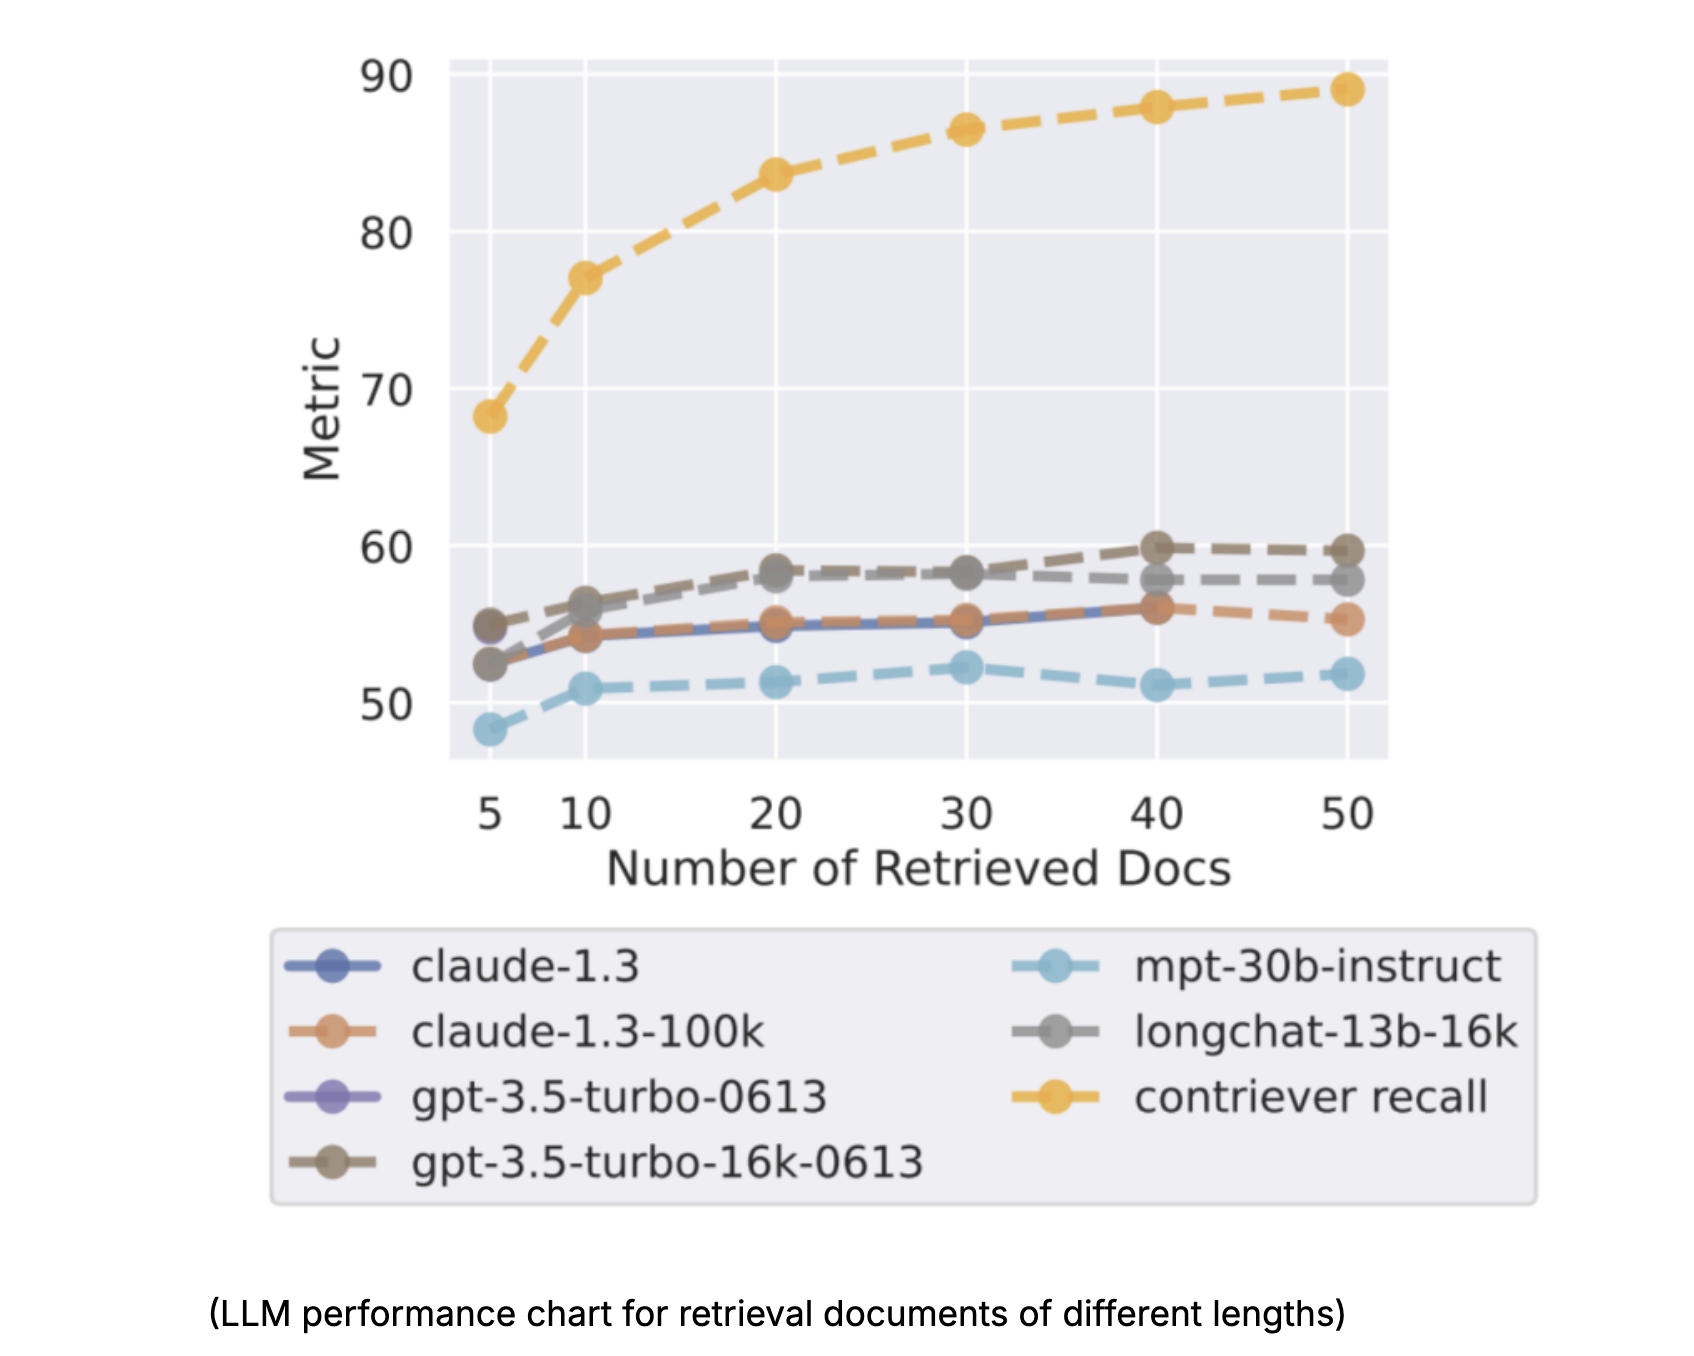


**Problems:**     
- **Cost:** Processing huge contexts is expensive per query
- **Latency:** Longer contexts = slower response times  
- **Relevance:** Finding needles in haystacks - RAG pre-filters relevant information
- **Scale:** You might have millions of documents, can't fit all in context
- **Precision:** RAG can search and retrieve exactly what's needed
- **"Needle in a Haystack" Problem:** LLM performance degrades when processing extremely long contexts - the model can easily overlook information located in the middle of the context

**Research shows:** Performance drops as the number of retrieved documents increases beyond a certain point, especially for models not optimized for long contexts.

## Why We Need RAG 

Because LLMs:
- Only know what was in training
- Have limited context
- Can hallucinate confidently

So we use RAG to:
- Retrieve fresh, factual, external data
- Inject it into the prompt
- Let the LLM reason over real sources


### RAG (Retrieval-Augmented Generation)
**Purpose:** Bring in **fresh, private, and cited** information to LLMs

**Definition:** The core idea of RAG is to first **Retrieve** relevant contextual information from an *external knowledge base*, then **Augment** the prompt with this information, and finally have the LLM **Generate** an answer based on the given information.

**Key Benefits:**
1. **Fresh data:** Access up-to-date information beyond training cutoff
2. **Private data:** Use your company's documents, databases
3. **Cited sources:** Provide verifiable references for answers
4. **No retraining needed:** Add new knowledge without fine-tuning
5. **Knowledge Update & Privatization:** Allows the LLM to access the latest or private data without retraining the model
6. **Reduces Hallucination & Increases Transparency:** Answers are based on explicitly provided context, allowing for easy fact-checking and the ability to provide citations and sources


#### The Naive RAG Pipeline

<img src="./pic/1_rag-diagram.webp" width=600>

```text
User Query
    ↓
1. DATA → Your documents (PDFs, text files, databases)
    ↓
2. PARSING → Extract text from various formats
    ↓
3. CHUNKING → Split into manageable pieces
    ↓
4. EMBEDDING → Convert text to numerical vectors
    ↓
5. INDEXING → Store in vector database
    ↓
6. RETRIEVAL → Find relevant chunks for query
    ↓
7. GENERATION → LLM generates answer using retrieved context
    ↓
Answer + Citations
```

**Example Flow:**

```text
Query: "What is our company's remote work policy?"

1. Data: Company handbook (PDF)
2. Parsing: Extract text from PDF
3. Chunking: Split into paragraphs
4. Embedding: Convert each chunk to vector [0.23, 0.45, ...]
5. Indexing: Store in vector DB
6. Retrieval: Find chunks about "remote work"
7. Generation: 
   Prompt: "Based on this context: [retrieved chunks]
   Answer: What is our company's remote work policy?"
   
Response: "According to the company handbook (page 15), 
employees can work remotely up to 3 days per week..."
```

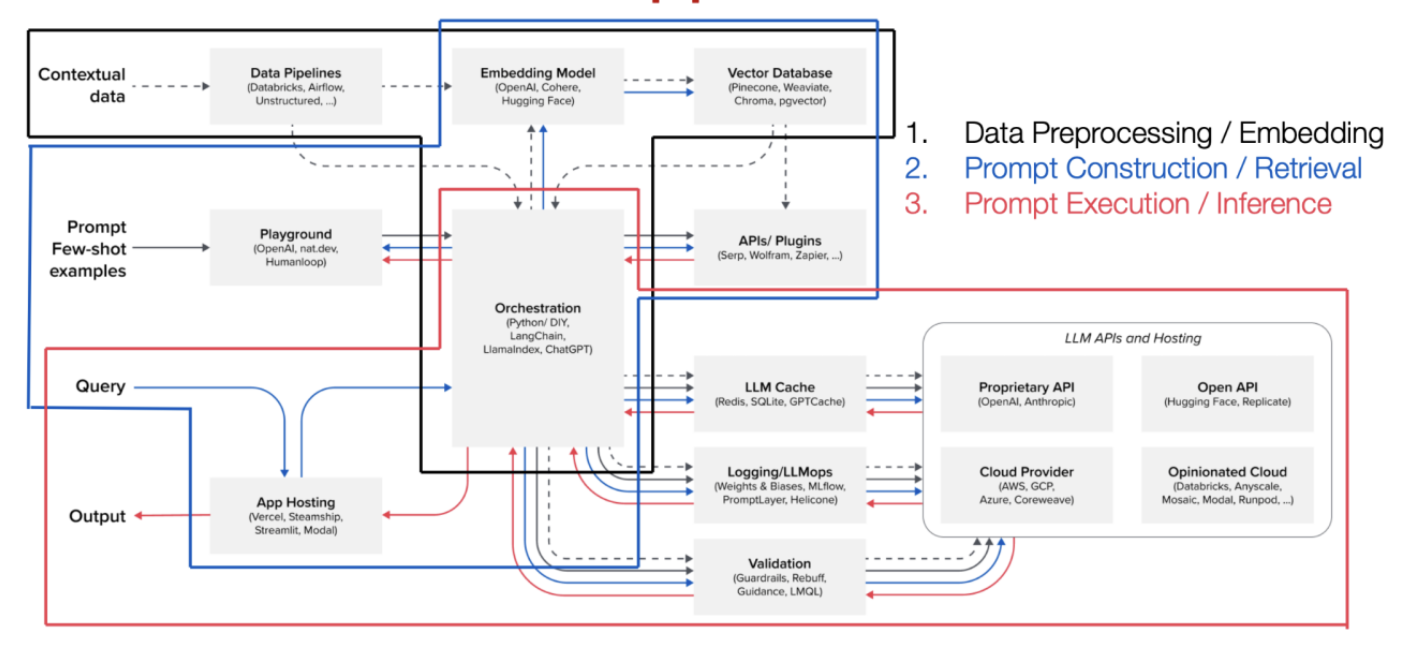

### RAG vs Fine-tuning

**Use RAG when:**
- You need to incorporate frequently changing information
- You want to **cite sources** and maintain transparency
- You have private/company-specific data
- You need quick updates without retraining
- Cost-effective for most use cases

**Use Fine-tuning when:**
- You need to change the model's behavior or style
- You want to teach domain-specific language patterns
- You need **consistent formatting or tone**
- The knowledge is relatively static

fine-tuning: You teach the model **how** to behave by giving it examples.
   

**Example Comparison:**

```text
Scenario: Customer support chatbot

RAG approach:
- Store product manuals, FAQs, recent tickets
- Retrieve relevant info for each query
- Easy to update when products change
- Can cite specific documentation

Fine-tuning approach:
- Train model on customer service conversations
- Learn company's communication style
- Better at handling complex, conversational flow
- Expensive to update with new product info
```

---

# Prompt Engineering
The way you ask an LLM to perform a task can dramatically affect the outcome. This is the art of prompt engineering.   

more details in the [Prompt Engineering Guide](https://www.promptingguide.ai/)

**Prompt Limitations**   
- **Inefficient** – extra input every time
- **Poor Performance** – generally performs **worse than fine-tuning**
- **Sensitivity** – small changes can affect results a lot (wording, order)
- **Lack of clarity** – not clear what model learns from the prompts


## Different Prompt Roles
Modern chat-style LLM APIs (e.g. [chatgpt](https://platform.openai.com/docs/models/gpt-5.1)) usually separate messages into different roles:  

### 1. System Prompt
- Sets the overall behavior and context
- Defines the AI's role and constraints
- Applied to the entire conversation

```python
system_prompt = """
You are a helpful technical documentation assistant.
You always:
- Answer based only on provided context
- Cite sources with page numbers
- Say "I don't know" if information isn't in the context
"""
```
Why this matters for engineers:  

- The system prompt is usually long and mostly stable across many requests.
- It often contains:
  - Safety and style guidelines,
  - Output format instructions (e.g., “answer in JSONˮ),
  - Domain-specific rules.
- Because it is reused across requests, the system prompt is a **great candidate for cached input** in modern APIs: 
  - once the model has processed it once, later 
calls can reuse that context at a lower “cached inputˮ cost instead of recomputing everything from scratch

### 2. User Prompt
- The actual query or request from the user
- Can include context and specific instructions
- Tell it what we want right now

```python
user_prompt = """
Context: [Retrieved document chunks]

Question: How do I reset my password?
"""
```

### 3. Tool Definitions
- Describe available functions/tools the LLM can use
- Used in function calling / agent systems

```python
tools = [
    {
        "name": "search_documents",
        "description": "Search through company documentation",
        "parameters": {
            "query": "string - search query",
            "max_results": "integer - number of results"
        }
    }
]
```



## Techniques

### 1. Zero-shot Prompting
Asking the model to perform a task **without any examples**.

**Zero-shot prompting** works because modern LLMs have **zero-shot learning ability**.

In [14]:
zero_shot_prompt = """Classify the sentiment of this text as Positive, Negative, or Neutral:

Text: "The product quality is amazing but the shipping took forever."

Sentiment:"""

result = ask_llm(zero_shot_prompt, temperature=0)
print("Zero-shot Result:")
print(result)


Zero-shot Result:
Sentiment: Mixed (Positive and Negative) 

However, if you need a single classification, it leans towards Negative due to the emphasis on the shipping issue.


### 2. Few-shot Prompting

**Technique:** Provide input→output examples to control format and behavior. 


- Example 1: **Sentiment Classification**   

In [15]:
few_shot_prompt = """Classify the sentiment of the text. Here are some examples:

Text: "This is awesome!"
Sentiment: Positive

Text: "This is bad!"
Sentiment: Negative

Text: "Wow that movie was rad!"
Sentiment: Positive

Text: "What a horrible show!"
Sentiment: Negative

Text: "The product quality is amazing but the shipping took forever."
Sentiment:"""

result = ask_llm(few_shot_prompt, temperature=0)
print("Few-shot Result:")
print(result)


Few-shot Result:
Mixed


- Example 2: **Structured Data Extraction**    

In [16]:
few_shot_prompt = """
Extract the name, email, and phone from customer messages.

Message: "Hi, I'm John Doe, reach me at john@email.com or 555-1234"
Output: {"name": "John Doe", "email": "john@email.com", "phone": "555-1234"}

Message: "This is Sarah calling, my email is sarah@company.com"
Output: {"name": "Sarah", "email": "sarah@company.com", "phone": null}

Message: "I'm Mike Chen, phone 555-9876, email mike.chen@work.org"
Output: [Model extracts in same JSON format]
"""

result = ask_llm(few_shot_prompt, temperature=0)
print("Few-shot Result:")
print(result)


Few-shot Result:
Output: {"name": "Mike Chen", "email": "mike.chen@work.org", "phone": "555-9876"}


Zero-Shot prompting VS Few-shot prompting   

**Key Difference:** Few-shot prompting provides examples that help the model understand the specific format and behavior you want.

### 3. Chain-of-Thought (CoT) Prompting 
Encouraging the model to "**think step by step**" to break down complex problems, which significantly improves **reasoning**.

<img src="./pic/1_cot.webp" width=700>

- **Without CoT**
```text
Question: A store has 23 apples. They sell 17 and receive a shipment of 35 more. 
How many apples do they have now?

Answer: 41 apples [might be wrong without reasoning]
```

- **With CoT**
```text
Question: A store has 23 apples. They sell 17 and receive a shipment of 35 more. 
How many apples do they have now? Think step by step.

Answer: 
Let me work through this step by step:
1. Starting apples: 23
2. After selling 17: 23 - 17 = 6
3. After receiving 35: 6 + 35 = 41
Final answer: 41 apples
```

In [17]:
# Without Chain-of-Thought
no_cot_prompt = """Roger has 5 tennis balls. He buys 2 more cans of tennis balls. 
Each can has 3 tennis balls. How many tennis balls does he have now?

Answer:"""

result = ask_llm(no_cot_prompt, temperature=0)
print("Without CoT:")
print(result)


Without CoT:
Roger initially has 5 tennis balls. He buys 2 cans of tennis balls, and each can contains 3 tennis balls. 

First, calculate the total number of tennis balls in the cans:
2 cans × 3 tennis balls per can = 6 tennis balls.

Now, add the tennis balls from the cans to the tennis balls he already has:
5 tennis balls + 6 tennis balls = 11 tennis balls.

Therefore, Roger now has a total of 11 tennis balls.


In [18]:
# With Chain-of-Thought
cot_prompt = """Solve this problem step by step:

Problem: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. 
Each can has 3 tennis balls. How many tennis balls does he have now?

Let's think step by step:"""

result = ask_llm(cot_prompt, temperature=0, model="gpt-4o-mini")
print("Chain-of-Thought Result:")
print(result)

Chain-of-Thought Result:
Sure! Let's solve the problem step by step.

1. **Identify the initial number of tennis balls Roger has**: 
   - Roger starts with 5 tennis balls.

2. **Determine how many tennis balls are in each can**: 
   - Each can contains 3 tennis balls.

3. **Identify how many cans Roger buys**: 
   - Roger buys 2 cans of tennis balls.

4. **Calculate the total number of tennis balls in the cans**: 
  


- **CoT for Document Analysis**
```text
Question: Based on the financial report, should we invest in this company?

Prompt with CoT:
"Analyze the financial report step by step:
1. First, identify the key financial metrics
2. Then, evaluate each metric's trend
3. Consider the risk factors mentioned
4. Finally, provide a recommendation with reasoning

Report: [financial data]"

Response:
"Step 1: Key metrics identified: Revenue growth (15%), Profit margin (8%), Debt ratio (2.5)
Step 2: Trends - Revenue increasing, margins stable, debt manageable
Step 3: Risks - Market competition, regulatory changes
Step 4: Recommendation - Moderate buy. Strong fundamentals but monitor competitive pressures."
```

Chain-of-Thoughts Prompting is Enhanced by Model Scale:  
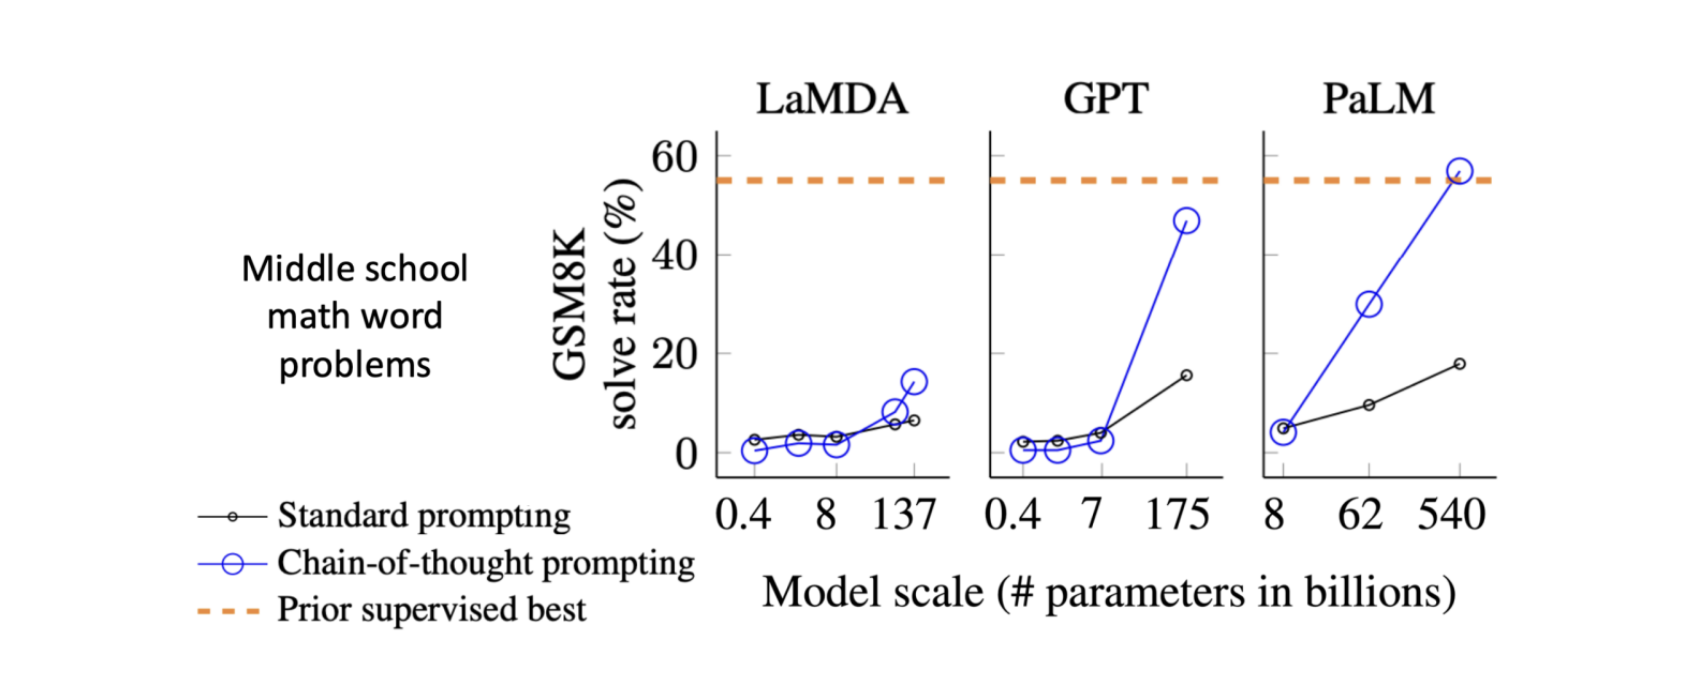


#### Zero-shot COT Prompting   
<img src="./pic/1_zero-cot.webp" width=700>

#### Auto-CoT (Automatic Chain-of-Thought)
- When applying CoT prompting with demonstrations, the process involves hand-crafting effective and diverse examples. This manual effort could lead to **suboptimal solutions**. 
- Zhang et al. (2022) propose an approach **to eliminate manual efforts** by leveraging LLMs with "Let's think step by step" prompt **to generate reasoning chains** for demonstrations one by one. 
- This automatic process can still end up with mistakes in generated chains. 
- To mitigate the effects of the mistakes, the diversity of demonstrations matter. 
- This work proposes Auto-CoT, which samples questions with diversity and generates reasoning chains to construct the demonstrations.

Auto-CoT consists of **two main stages**:

- Stage 1 - **question clustering**: partition questions of a given dataset into a few clusters
- Stage 2 - **demonstration sampling**: select a representative question from each cluster and generate its **reasoning chain** using **Zero-Shot-CoT** with simple heuristics   

The simple heuristics could be length of questions (e.g., 60 tokens) and number of steps in rationale (e.g., 5 reasoning steps). This encourages the model to use simple and accurate demonstrations. 

The process is illustrated below:   

<img src="./pic/1_auto-cot.webp" width=700>

### 4. Meta Prompting
- An advanced prompting technique that focuses on the **structural and syntactical aspects** of tasks and problems rather than their specific content details. 
- To construct a more abstract, structured way of interacting with LLMs, **emphasizing the form and pattern of information** over traditional content-centric methods.

**Key Characteristics**   

1. **Structure-oriented**: Prioritizes the format and pattern of problems and solutions over specific content.

2. **Syntax-focused**: Uses syntax as a guiding template for the expected response or solution.

3. **Abstract examples**: Employs abstracted examples as frameworks, illustrating the structure of problems and solutions without focusing on specific details.

4. **Versatile**: Applicable across various domains, capable of providing structured responses to a wide range of problems.

5. **Categorical approach**: Draws from type theory to emphasize the categorization and logical arrangement of components in a prompt.

**Meta VS Few-Shot Prompting**   
- meta prompting: focuses on a more structure-oriented approach
- few-shot prompting: content-driven approach.

**Advantages over Few-Shot Prompting**    
1. **Token efficiency**: Reduces the number of tokens required by focusing on structure rather than detailed content.

2. **Fair comparison**: Provides a more fair approach for comparing different problem-solving models by minimizing the influence of specific examples.

3. **Zero-shot efficacy**: Can be viewed as a form of zero-shot prompting, where the influence of specific examples is minimized.


<img src="./pic/1_meta-prompting.webp" >

# Practical RAG Implementation



## Naive RAG Pipeline Step-by-Step



### 1. Data 
Source formats:
- PDFs, DOCX, HTML pages, wiki pages.
- Sometimes images, tables, charts (later weʼll treat these more carefully).

### 2. Parsing
Convert each document into clean text.
Deal with:
- Headers/footers.
- Tables(tables spanning pages).
- Lists and code blocks.
- Image


### 3. Chunking 
Break long text into chunks small enough for:
- The embedding modelʼs **max token limit**.
- The LLM **context window** later.

Basic (Naive) chunking: Fixed-size windows, e.g. 5001,000 characters with some overlap.   
Advanced chunking (later in course)


In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=100,
    length_function=len,
    separators=["\n\n", "\n", " ", ""]
)

sample_document = """
Introduction to Artificial Intelligence

Artificial Intelligence (AI) is a branch of computer science that aims to create 
intelligent machines that can perform tasks that typically require human intelligence. 
These tasks include learning, reasoning, problem-solving, perception, and language understanding.

History of AI

The field of AI was formally founded in 1956 at a conference at Dartmouth College. 
Early AI research focused on symbolic methods and problem-solving. The term 
"artificial intelligence" was coined by John McCarthy, who is considered one of the 
founding fathers of the field.

Modern AI Applications

Today, AI is used in many applications including virtual assistants like Siri and Alexa, 
recommendation systems on Netflix and Spotify, autonomous vehicles, medical diagnosis, 
and natural language processing systems like ChatGPT. Machine learning, particularly 
deep learning, has been the driving force behind recent AI breakthroughs.
"""

chunks = text_splitter.split_text(sample_document)
print(f"Original document: {len(sample_document)} characters")
print(f"Split into {len(chunks)} chunks")
for i, chunk in enumerate(chunks):
    print(f"--- Chunk {i+1} ({len(chunk)} chars) ---")
    print(chunk[:200] + "..." if len(chunk) > 200 else chunk)
    print()

Original document: 966 characters
Split into 3 chunks
--- Chunk 1 (323 chars) ---
Introduction to Artificial Intelligence

Artificial Intelligence (AI) is a branch of computer science that aims to create 
intelligent machines that can perform tasks that typically require human inte...

--- Chunk 2 (315 chars) ---
History of AI

The field of AI was formally founded in 1956 at a conference at Dartmouth College. 
Early AI research focused on symbolic methods and problem-solving. The term 
"artificial intelligence...

--- Chunk 3 (361 chars) ---
Modern AI Applications

Today, AI is used in many applications including virtual assistants like Siri and Alexa, 
recommendation systems on Netflix and Spotify, autonomous vehicles, medical diagnosis,...



### 4. Embeddings

- For **each chunk**, create an **embedding vector** using an **embedding model**.
- Nearby vectors in this high-dimensional space correspond to **semantically similar** pieces of text.
- You also embed **user queries** at runtime, so you can compare query vectors to chunk vectors.


In [28]:
def get_embedding(text: str, model: str = "text-embedding-3-small"):
    """Get vector representation of text."""
    response = client.embeddings.create(input=text, model=model)
    return response.data[0].embedding

chunk_embeddings = []
for i, chunk in enumerate(chunks):
    embedding = get_embedding(chunk)
    chunk_embeddings.append(embedding)
    print(f"Chunk {i+1}: Generated embedding with {len(embedding)} dimensions")

print(f"\nEmbedding dimensions: {len(chunk_embeddings[0])}")

Chunk 1: Generated embedding with 1536 dimensions
Chunk 2: Generated embedding with 1536 dimensions
Chunk 3: Generated embedding with 1536 dimensions

Embedding dimensions: 1536


### 5. Indexing (Vector Search)
Store embeddings in a **vector database** like Chroma, FAISS, or pgvector.  

Vector DB responsibilities:
- Efficient nearest-neighbor search even with millions of chunks.
- Metadata filters (user, document type, tags).
- Hybrid search (combine semantic and keyword search).

In [29]:
import numpy as np

def cosine_similarity(a, b):
    """Calculate cosine similarity between two vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def search(query: str, chunks: list, embeddings: list, top_k: int = 2):
    """Search for most relevant chunks."""
    query_embedding = get_embedding(query)
    
    similarities = []
    for i, chunk_emb in enumerate(embeddings):
        sim = cosine_similarity(query_embedding, chunk_emb)
        similarities.append((i, sim, chunks[i]))
    
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_k]

query = "When was AI founded?"
results = search(query, chunks, chunk_embeddings, top_k=2)

print(f"Query: {query}\n")
print("Search Results:")
for idx, similarity, content in results:
    print(f"\n[Chunk {idx+1}] Similarity: {similarity:.4f}")
    print(f"Content: {content[:200]}...")


Query: When was AI founded?

Search Results:

[Chunk 2] Similarity: 0.6606
Content: History of AI

The field of AI was formally founded in 1956 at a conference at Dartmouth College. 
Early AI research focused on symbolic methods and problem-solving. The term 
"artificial intelligence...

[Chunk 1] Similarity: 0.5808
Content: Introduction to Artificial Intelligence

Artificial Intelligence (AI) is a branch of computer science that aims to create 
intelligent machines that can perform tasks that typically require human inte...


### 6. Retrieval
At query time:
- Embed the userʼs question.
- Run similarity search in the vector DB to get top-k chunks. 
- Optionally rerank or post-filter (e.g., by permissions, recency).

### 7. Generation
- Build a prompt that contains:
  - System instructions (role, style, constraints).
  - The userʼs question.
  - Retrieved context chunks.
- Send this prompt to the LLM.
- The LLM generates the answer, ideally grounding it in the retrieved context and including citations.


In [30]:
def rag_answer(query: str, chunks: list, embeddings: list, top_k: int = 2):
    """Complete RAG pipeline: retrieval + generation."""
    results = search(query, chunks, embeddings, top_k=top_k)
    context = "\n\n".join([f"[Chunk {idx+1}] {content}" for idx, _, content in results])
    
    messages = [
        {"role": "system", "content": FEW_SHOT_RAG_TEMPLATE.system_prompt},
        {"role": "user", "content": FEW_SHOT_RAG_TEMPLATE.user_prompt_template.format(
            context=context,
            question=query
        )}
    ]
    
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0
    )
    
    return {
        "query": query,
        "context": context,
        "answer": response.choices[0].message.content,
        "sources": [(idx, sim) for idx, sim, _ in results]
    }


result = rag_answer("What are some modern applications of AI?", chunks, chunk_embeddings)

print("Query:", result["query"])
print("\n" + "="*60)
print("\nRetrieved Context:")
print(result["context"][:500] + "...")
print("\n" + "="*60)
print("\nGenerated Answer:")
print(result["answer"])
print("\nSources:", result["sources"])


Query: What are some modern applications of AI?


Retrieved Context:
[Chunk 3] Modern AI Applications

Today, AI is used in many applications including virtual assistants like Siri and Alexa, 
recommendation systems on Netflix and Spotify, autonomous vehicles, medical diagnosis, 
and natural language processing systems like ChatGPT. Machine learning, particularly 
deep learning, has been the driving force behind recent AI breakthroughs.

[Chunk 2] History of AI

The field of AI was formally founded in 1956 at a conference at Dartmouth College. 
Early AI research ...


Generated Answer:
According to the document titled "Modern AI Applications," AI is currently utilized in various applications, including virtual assistants like Siri and Alexa, recommendation systems on platforms such as Netflix and Spotify, autonomous vehicles, medical diagnosis, and natural language processing systems like ChatGPT. Additionally, machine learning, especially deep learning, has been a key factor in recent

## LangChain RAG Implementation

**What is Longchain**
- A toolbox that makes building LLM apps easier
- A Python/JavaScript framework that helps developers build applications powered by Large Language Models (LLMs).
- It provides tools that simplify common tasks such as:
    - connecting to LLMs (OpenAI, Anthropic, HuggingFace…)
    - loading and transforming documents
    - chunking and embedding text
    - building retrieval systems (RAG)
    - creating agents that can call tools
    - managing prompts and chains of steps

Without LangChain → you need to write everything manually (embedding, vector DB, retrieval logic…).    
With LangChain → many of these are plug-and-play.  


**LangChain RAG** refers to using LangChain to build a RAG pipeline.  

In [31]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.documents import Document

class SimpleLangChainRAG:
    """Simplified LangChain RAG implementation."""
    
    def __init__(self):
        self.llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
        self.embeddings = OpenAIEmbeddings()
        self.vectorstore = None
    
    def build_index(self, texts: list, metadatas: list = None):
        """Build vector index from texts."""
        documents = [
            Document(page_content=text, metadata=meta or {})
            for text, meta in zip(texts, metadatas or [{}] * len(texts))
        ]
        self.vectorstore = FAISS.from_documents(documents, self.embeddings)
        print(f"Built FAISS index with {len(texts)} documents")
    
    def query(self, question: str):
        """Query the RAG system."""
        if not self.vectorstore:
            raise ValueError("Index not built. Call build_index first.")
        
        # Retrieve similar documents
        docs = self.vectorstore.similarity_search(question, k=3)
        context = "\n\n".join([doc.page_content for doc in docs])
        
        # Generate answer
        messages = [
            {"role": "system", "content": "Answer based on the context provided."},
            {"role": "user", "content": f"Context:\n{context}\n\nQuestion: {question}"}
        ]
        
        response = self.llm.invoke(messages)
        return {
            "answer": response.content,
            "sources": [doc.metadata for doc in docs]
        }

# Usage example
rag = SimpleLangChainRAG()

company_docs = [
    "The company's Q3 2024 revenue was $15.2 million, up 23% year-over-year.",
    "Our new product line launched in September 2024 with a 4.8/5 rating.",
    "The CEO announced plans to expand into Asian markets in 2025.",
    "Q4 projections indicate expected revenue of $18 million.",
    "Employee satisfaction survey shows 85% positive ratings."
]

doc_metadata = [
    {"source": "financial_report.pdf", "page": 5},
    {"source": "product_update.pdf", "page": 2},
    {"source": "strategy_memo.pdf", "page": 1},
    {"source": "financial_report.pdf", "page": 12},
    {"source": "hr_report.pdf", "page": 3},
]

rag.build_index(company_docs, doc_metadata)

# Query the system
questions = [
    "What was the Q3 revenue?",
    "What are the expansion plans for 2025?",
    "How did the new product perform?"
]

for q in questions:
    print("\n" + "="*60)
    print(f"Question: {q}")
    print("="*60)
    
    result = rag.query(q)
    
    print(f"\nAnswer: {result['answer']}")
    print(f"\nSources: {result['sources']}")


Built FAISS index with 5 documents

Question: What was the Q3 revenue?

Answer: The Q3 revenue was $15.2 million.

Sources: [{'source': 'financial_report.pdf', 'page': 5}, {'source': 'financial_report.pdf', 'page': 12}, {'source': 'hr_report.pdf', 'page': 3}]

Question: What are the expansion plans for 2025?

Answer: The expansion plans for 2025 involve entering Asian markets.

Sources: [{'source': 'strategy_memo.pdf', 'page': 1}, {'source': 'financial_report.pdf', 'page': 5}, {'source': 'financial_report.pdf', 'page': 12}]

Question: How did the new product perform?

Answer: The new product line performed exceptionally well, achieving a high customer rating of 4.8 out of 5. This indicates strong customer satisfaction and acceptance of the product. Additionally, the company's overall revenue for Q3 2024 was $15.2 million, reflecting a 23% increase year-over-year, which suggests that the new product likely contributed positively to the revenue growth. Overall, the performance of the new

## Prompt Templates for RAG

1. **Document Processing:**
   - Chunk summarization prompts
   - Metadata extraction prompts

2. **Retrieval Phase:**
   - Query reformulation prompts
   - Relevance scoring prompts

3. **Generation Phase:**
   - Answer generation with citations
   - Response formatting prompts

4. **Quality Control:**
   - Self-evaluation prompts
   - Fact-checking prompts

**Example `templates.py` Structure:**

```python
# templates.py

SYSTEM_PROMPT = """You are an AI assistant specialized in RAG..."""

QUERY_REWRITE_TEMPLATE = """
Rewrite the user's query to be more specific and searchable.
Original: {query}
Rewritten:
"""

RETRIEVAL_PROMPT = """
Based on the query, these chunks were retrieved.
Rank them by relevance...
"""

ANSWER_GENERATION_TEMPLATE = """
Context: {context}
Question: {question}
Instructions: {instructions}

Answer:
"""

CITATION_FORMAT = "[Source: {source}, Page: {page}, Confidence: {confidence}]"
```


In [ ]:
from pydantic import BaseModel

class PromptTemplate(BaseModel):
    """Base class for prompt templates."""
    name: str
    system_prompt: str
    user_prompt_template: str
    description: str


FEW_SHOT_RAG_TEMPLATE = PromptTemplate(
    name="few_shot_rag",
    description="RAG template with few-shot examples for better performance",
    system_prompt="""You are a document Q&A assistant. Learn from these examples:

Example 1:
Context: [Financial Report 2023, Page 5] Q3 revenue was $15.2M, up 23% YoY.
Question: What was the Q3 revenue?
Answer: According to the Financial Report 2023 (Page 5), Q3 revenue was $15.2 million, representing a 23% year-over-year increase.

Example 2:
Context: [Product Specs, Page 12] The device weighs 1.2kg and measures 30x20x5cm.
Question: What are the dimensions?
Answer: Based on the Product Specs document (Page 12), the device dimensions are 30cm x 20cm x 5cm, with a weight of 1.2kg.

Example 3:
Context: [Meeting Notes, Page 3] Launch date set for Q2 2024, pending regulatory approval.
Question: When will we launch?
Answer: According to the Meeting Notes (Page 3), the launch is planned for Q2 2024, subject to regulatory approval.

Now answer questions in the same format: clearly cite sources with document names and page numbers.""",
    user_prompt_template="""Context: {context}

Question: {question}

Answer:"""
)

COT_RAG_TEMPLATE = PromptTemplate(
    name="cot_rag",
    description="Chain-of-Thought reasoning for complex queries",
    system_prompt="""You are an analytical AI assistant that thinks step-by-step.

When answering questions, follow this reasoning process:
1. Understand: Identify what information is needed
2. Search: Locate relevant information in the provided context
3. Analyze: Connect different pieces of information
4. Synthesize: Form a comprehensive answer
5. Cite: Provide specific document references

Show your reasoning process clearly before giving the final answer.""",
    user_prompt_template="""Context from documents:
{context}

Question: {question}

Think step-by-step:
1. What specific information do I need to answer this question?
2. What relevant information is available in the context?
3. How do these pieces of information connect?
4. What is the comprehensive answer?

Provide your reasoning and then your final answer with citations."""
)

print("Prompt Templates loaded")
print(f"Available templates: {FEW_SHOT_RAG_TEMPLATE.name}, {COT_RAG_TEMPLATE.name}")


Prompt Templates loaded
Available templates: few_shot_rag, cot_rag


In [ ]:
"""
Demo: Using the Few-shot RAG Template
"""

sample_context = """[Annual Report 2024, Page 15] The company's total revenue reached $42.5 million in fiscal year 2024, 
representing a 35% increase compared to the previous year. The growth was primarily driven by 
expansion in the Asia-Pacific market and successful launch of our new enterprise product line.

[Strategy Memo, Page 3] The board has approved plans to open 3 new offices in Singapore, 
Tokyo, and Sydney by Q3 2025."""

question = "What drove the company's revenue growth?"

messages = [
    {"role": "system", "content": FEW_SHOT_RAG_TEMPLATE.system_prompt},
    {"role": "user", "content": FEW_SHOT_RAG_TEMPLATE.user_prompt_template.format(
        context=sample_context,
        question=question
    )}
]

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature=0
)

print("Context (Retrieved Documents):")
print(sample_context)
print("\n" + "="*60)
print(f"\nQuestion: {question}")
print("\n" + "="*60)
print(f"\nAnswer:")
print(response.choices[0].message.content)


Context (Retrieved Documents):
[Annual Report 2024, Page 15] The company's total revenue reached $42.5 million in fiscal year 2024, 
representing a 35% increase compared to the previous year. The growth was primarily driven by 
expansion in the Asia-Pacific market and successful launch of our new enterprise product line.

[Strategy Memo, Page 3] The board has approved plans to open 3 new offices in Singapore, 
Tokyo, and Sydney by Q3 2025.


Question: What drove the company's revenue growth?


Answer:
According to the Annual Report 2024 (Page 15), the company's revenue growth was primarily driven by expansion in the Asia-Pacific market and the successful launch of their new enterprise product line.


# Comparison
RAG VS Fine-Tuning VS Prompt Engineering  

<img src="./pic/1_RAG VS Fine-Tuning VS Prompt Engineering.png" width=600>  

LLM VS RAG VS Agent VS Agent AI  

<img src="./pic/1_LLM VS RAG VS Agent VS Agent AI.jpeg" width=600>


<img src="./pic/1_LLM VS Fine-Tuning VS Agent VS Agent AI.webp" width=600>

## Key Takeaways

### Interview Prep

**Be ready to explain:**

1. **What is RAG?**
   - "RAG is a technique that enhances LLM responses by retrieving relevant information from external sources and including it in the prompt, enabling the model to answer questions about data it wasn't trained on."

2. **Why RAG over fine-tuning?**
   - "RAG is better for frequently updated information, private data access, and when you need citations. Fine-tuning is better for changing the model's behavior or learning specialized language patterns."

3. **RAG pipeline stages:**
   - Data → Parse → Chunk → Embed → Index → Retrieve → Generate

4. **Prompt engineering in RAG:**
   - "We use structured prompts to ensure the model answers only from retrieved context, provides citations, and formats responses consistently. Few-shot examples help control output format, while chain-of-thought helps with complex reasoning."

5. **Context window and tokens:**
   - Explain what tokens are, why they matter for pricing, and limitations of even large context windows

6. **Temperature and sampling:**
   - How to tune for factual vs creative tasks

### Hands-on Skills

After this note, you should be able to:

✅ Design prompts that enforce specific output formats (JSON, citations)  
✅ Use few-shot examples to control LLM behavior  
✅ Implement chain-of-thought for reasoning tasks  
✅ Explain the full RAG pipeline and where each prompt fits  
✅ Create a `templates.py` module with reusable prompt templates  
✅ Answer "why RAG" questions in technical interviews  
✅ Call LLM APIs (local and hosted) with proper parameters  
✅ Implement basic chunking, embedding, and vector search  

## Next Steps

- Practice writing prompt templates for different RAG stages
- Experiment with temperature and sampling parameters
- Build a simple RAG demo using the naive pipeline
- Review how major RAG frameworks (LangChain, LlamaIndex) structure their prompts
- Explore advanced RAG techniques (HyDE, Self-RAG, RAPTOR)

---



# Additional Resources

**Papers & Research:**
- [Attention Is All You Need](https://papers.neurips.cc/paper/7181-attention-is-all-you-need.pdf) - Original Transformer paper
- [Prompting Guide](https://www.promptingguide.ai/techniques/cot) - Comprehensive prompting techniques
- ReAct pattern for agent design
- [AI 50 2025](https://sequoiacap.com/article/ai-50-2025/) - Leading AI companies

**Concepts to Explore Further:**
- Embedding models (how text becomes vectors)
- Vector databases (Pinecone, Weaviate, ChromaDB, FAISS)
- Semantic vs keyword search
- Hybrid retrieval strategies
- Advanced RAG architectures
- Multi-agent systems

**Common Pitfalls to Avoid:**
- Chunks too large → context overflow
- Chunks too small → loss of meaning
- Poor retrieval → wrong context → hallucination
- No citation tracking → can't verify answers
- Overly vague prompts → inconsistent outputs
- Ignoring token efficiency → high costs

**Development Tools:**
- AI coding assistants: Cursor, Windsurf, GitHub Copilot
- Local LLM: Ollama
- Vector databases: FAISS, Chroma
- Frameworks: LangChain, LlamaIndex
